# Inicio del análisis

**1 Abre el archivo de datos y estudia la información general**

In [1]:
# Carga de todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# Carga del archivo de datos en un DataFrame
data_base = pd.read_csv('/datasets/games.csv')

In [3]:
# Información general del DataFrame
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Visualización de una muestra DataFrame
data_base.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Visualización de cantidad de valores ausentes
data_base.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**2 Prepara los datos**

In [6]:
#Colocando en minúscula los nombres de las columnas
data_base.columns = data_base.columns.str.lower()

In [7]:
#Procedemos a revisar si existen valores ausentes
data_base.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

De lo anterior verificamos que las columnas 'name', 'year_of_releas', 'genre', 'critic_score', 'user_score' y 'user_score' poseen valores ausentes.

In [8]:
#Procedemos a revisar si existen filas duplicadas explícitas
data_base.duplicated().sum()

0

De lo anterior veriticamos que no existen filas duplicadas explícitas.

Las columnas 'name' y 'genre' tienen la misma cantidad de valores ausentes, es probable que  pertenezcan a las mismas filas; se procede a corroborar ello.

In [9]:
#Procedemos a realizar una visualización de las filas con valores ausentes en la columna 'name'
data_base[data_base['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
#Procedemos a realizar una visualización de las filas con valores ausentes en la columna 'genre'
data_base[data_base['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Verificamos que las 2 filas que tienen valores ausentes en la columna 'name' son exactamente las mismas 2 filas que tienen valores ausentes en la columna 'genre', por lo que es probable que haya existido un problema con el registro de esas 2 filas en esos campos. Se proceden a eliminar ambas filas al no proporcionar información para clasificar la data recolectada de las columnas de ventas.

In [11]:
#Procedemos a eliminar las 2 filas con valores ausentes en las columnas 'name' y 'genre'
data_base.dropna(subset=['name'] , inplace = True)
data_base.reset_index(drop=True, inplace = True)


Se procede a responder las preguntas sobre el tratamiento de los valores ausentes:<br>
**Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.**<br>
Se decidió dejarlos en blanco ya que no existe forma posible de rellenarlos con algún valor específico; y posteriormente, al no brindar información relevante para los siguientes análisis, se encontró que la mejor decisión era prescindir de dichas filas.<br>
**¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.**<br>
En comparación de los 16715 registros originales, es probable que el sistema de registro haya fallado en estos 2 casos particulares. También pudo haber ocurrido que el usuario haya ingresado incorrectamente la información en dichos 2 casos.

In [12]:
#Procedemos a realizar una visualización de las filas con valores ausentes en la columna 'year_of_release'
data_base[data_base['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


De lo anterior se observa que no existe una tendencia específica de las filas sin información del año de lanzamiento. Como los análisis posteriores requieren la inforamción del año de lanzamiento es que se procede con prescindir de las filas con dicha ausencia de información

In [13]:
#Procedemos a eliminar las filas con valores ausentes en la columna 'year_of_release'
data_base.dropna(subset=['year_of_release'] , inplace = True)
data_base.reset_index(drop=True, inplace = True)

In [14]:
#Procedemos a convertir el tipo de dato de la columna 'year_of_release' a uno de tipo integer ya que 
#se supone debe contenter números enteros
data_base['year_of_release']=data_base['year_of_release'].astype('Int64')
#Verificamos lo realizado hasta el momento con la columna 'year_of_release'
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [15]:
#Procedemos a realizar una visualización de las filas con valores ausentes en la columna 'critic_score'
data_base[data_base['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
#Procedemos a realizar una visualización de las filas con valores ausentes en la columna 'user_score'
data_base[data_base['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
#Procedemos a realizar una visualización de las filas con valores ausentes en la columna 'rating'
data_base[data_base['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Se procede a responder las preguntas sobre el tratamiento de los valores ausentes:<br>
**Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.**<br>
Se decidió dejarlos en blanco de momento ya que, a pesar que se aprecia una relación de ausencia de información entre las columnas 'critic_score', 'user_score' y 'rating', no puede afirmarse que en todos los casos donde una de dichas columnas tenga un valor ausente, en las otras dos columnas también tendrá valor ausente ya que anteriormente verificamos una diferente cantidad de valores no nulos entre estas 3 columnas. Además, se aprecia que a pesar de no brindar información en estas columnas, sí brinda información relevante y útil para posteriores análisis; por ello se decidió no eliminar estas filas.<br>
**¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.**<br>
Es probable que dichos juegos no hayan sido enviados a evaluarse para obtener un punaje o crítica oficial; razón por la cual estas 3 columnas carecen de información en algunos casos.

In [18]:
#Se sospecha que la columna 'critic_score' posee sólo números enteros (y valores ausentes)
#Se procede a verificar esta sospecha
data_base['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Se confirma que la columna 'critic_score' tiene como intención brindar valores enteros del tipo 'int', por lo tanto se requiere cambiar el tipo de dato para dicho columna

In [19]:
#Procedemos a convertir el tipo de dato de la columna 'critic_score' a uno de tipo integer ya que 
#se supone debe contenter números enteros
data_base['critic_score']=data_base['critic_score'].astype('Int64')
#Verificamos lo realizado hasta el momento con la columna 'critic_score'
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


In [20]:
#Observamos aún una importante cantidad de datos vacíós en el campo 'critic_scores', procedemos a cuantificar
#porcentualmente dicha ausencia de datos para tomar una decisión sobre dichos valores ausentes
percentaje_critic_score_na = len(data_base[data_base['critic_score'].isna()])*100/len(data_base['critic_score'])
print(f"{percentaje_critic_score_na:.2f}%")

51.45%


Se aprecia que los datos faltantes representan un poco más de la mitad de toda la data disponible, por lo que se concluye que debe llenarse con algún valor los valores ausentes de dicho campo. A continuación procedemos a realizar un análisis para decidir si es más adecuado reemplazar los valores ausentes por la media o por la mediana.

<function matplotlib.pyplot.show(close=None, block=None)>

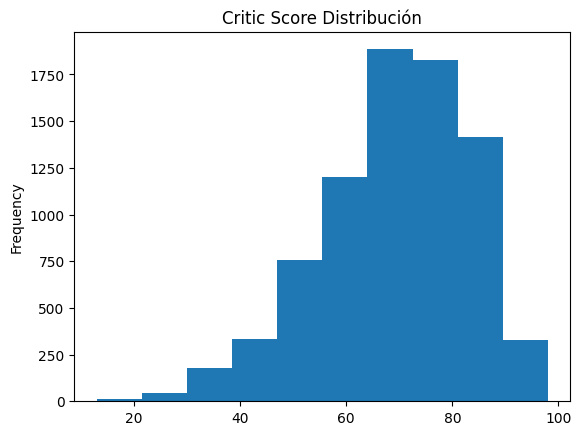

In [21]:
#Analizamos la frecuancia de los datos de la columna 'critic_score'
data_base['critic_score'].plot(kind='hist')
plt.title('Critic Score Distribución')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

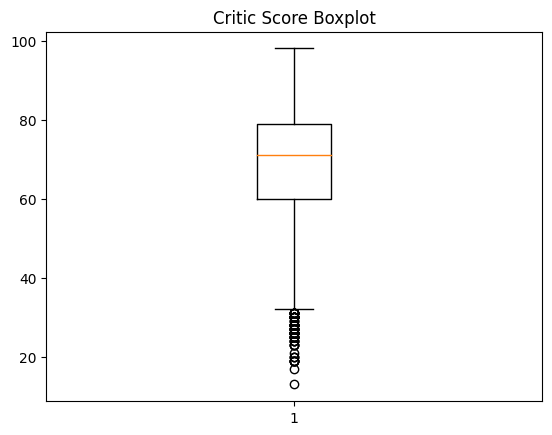

In [22]:
#Analizamos la posible existencia de datos atípicos en la columna 'critic_score'
plt.boxplot(data_base[data_base['critic_score'].notnull()]['critic_score'])
plt.title('Critic Score Boxplot')
plt.show

En la primera gráfica (Frecuencias) se aprecia que hay una distribución de los datos sesgada hacia la derecha; además, la segunda gráfica (Diagrama de Caja) muestra la existencia de valores extremos atípicos. Por lo tanto se procede a reemplazar los datos ausentes por la mediana.

In [23]:
#Procedemos a reemplazar los valores ausentes por la mediana en la columna 'critic_score'
data_base['critic_score'].fillna(data_base['critic_score'].median(),inplace = True)
#Verificamos lo realizado hasta el momento con la columna 'critic_score'
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int64  
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


Se procede a responder las preguntas sobre el tratamiento de los valores ausentes:<br>
**Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.**<br>
Se decidió reemplazarlos por el valor de la mediana debido a la asimetría de la distribución de los datos de la columna 'critic_score'.<br>
**¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.**<br>
Tomando ahora en cuenta el porcentaje de ausencia de datos del 50% aproximadamente para la columna 'critic_score' es que se sospecha que hubo problemas en el ingreso de la información de dicho parámetro a la plataforma correspondiente.

In [24]:
#Con respecto a la columna 'user_score', se apreció anteriormente que cuenta con números decimales; sin embargo,
#en la información de las columnas se le está identificando como un tipo object en lugar de float64, se procede
#a buscar el motivo
data_base['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Además de los valores decimales, se aprecian valores vacíos pero además un valor denominado 'tbd'; el cual probablemente significaría 'to be determinated' lo cual no brindaría información cuantitativa al análisis. Se procede a cuantificar la presencia de este valor para 'user_score' en función de los otros campos relevantes y; en base a ello, tomar una decisión.

In [25]:
#Crearemos una tabla que nos permita observar que tan presente está el valor 'tbd' en función del año y plataforma
data_base_tbd = data_base[data_base['user_score'] == 'tbd'].groupby(['year_of_release', 'platform'])['name'].count().unstack()
data_base_tbd['total_by_platform'] = data_base_tbd.sum(axis=1)
data_base_tbd.loc['total_by_year_of_release'] = data_base_tbd.sum(axis=0)
data_base_tbd

platform,3DS,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,total_by_platform
year_of_release,,,,,,,,,,,,,,,,,
1997,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1999,NaN,NaN,NaN,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
2000,NaN,NaN,NaN,NaN,NaN,27.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0
2001,NaN,NaN,44.0,2.0,NaN,9.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,82.0
2002,NaN,NaN,83.0,36.0,1.0,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,192.0
2003,NaN,NaN,36.0,19.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,95.0
2004,NaN,1.0,48.0,15.0,NaN,NaN,14.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,28.0,NaN,107.0
2005,NaN,17.0,37.0,18.0,1.0,NaN,15.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,30.0,NaN,121.0
2006,NaN,35.0,9.0,8.0,2.0,NaN,18.0,1.0,NaN,31.0,NaN,3.0,NaN,1.0,16.0,NaN,124.0


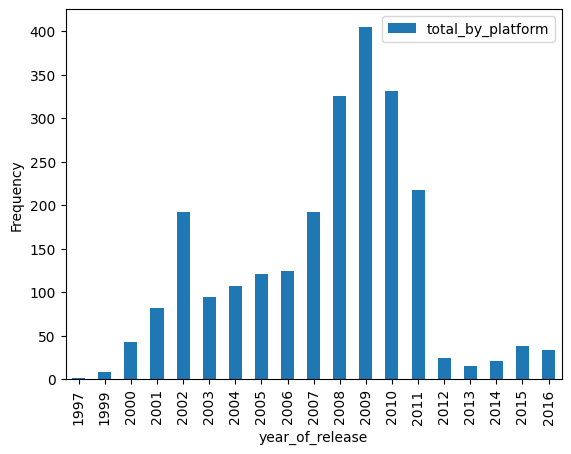

In [27]:
#De la tabla anterior parece que existe una distribución que se concentra en años intermedios, se procede a verificar
#dicha asunción
data_base_tbd_years = data_base_tbd.drop('total_by_year_of_release', axis=0)
data_base_tbd_years.plot(kind='bar', y = 'total_by_platform', ylabel='Frequency')
plt.show()

Se comprueba que existe una aparente concentración de valores 'tbd' en anos intermedios.

In [28]:
#Analizamos la posibilidad de si la presencia del valor 'tbd' tiene mayor presencia en algún tipo de género en específico
data_base[data_base['user_score']=='tbd'].groupby(['genre'])['name'].count()

genre
Action          368
Adventure       156
Fighting         37
Misc            440
Platform        135
Puzzle          208
Racing          229
Role-Playing     30
Shooter          95
Simulation      233
Sports          406
Strategy         39
Name: name, dtype: int64

No hay una predominancia de la presencia del valor 'tbd' respecto del género

Procedemos a cambiar entonces los valores 'tbd' por valores ausentes en la columna 'user_score' para los siguientes análisis; ya las filas donde existen estos valores si brindan información en otros campos relevantes.

In [29]:
#Cambiando el valor 'tbt' por uno ausente en la columna 'user_score'
data_base['user_score'].replace('tbd', np.nan, inplace = True)
#A continuación se procede a cambiar el tipo de variable 'object' a 'float64'
#a la columna 'user_score'
data_base['user_score'] = data_base['user_score'].astype('float')
#Verificamos lo realizado hasta el momento con la columna 'user_score'
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


In [30]:
#Observamos aún una importante cantidad de datos vacíós en el campo 'user_score', procedemos a cuantificar
#porcentualmente dicha ausencia de datos para tomar una decisión sobre dichos valores ausentes
percentaje_user_score_na = len(data_base[data_base['user_score'].isna()])*100/len(data_base['user_score'])
print(f"{percentaje_user_score_na:.2f}%")

54.62%


Se aprecia que los datos faltantes representan un poco más de la mitad de toda la data disponible, por lo que se concluye que debe llenarse con algún valor los valores ausentes de dicho campo. A continuación procedemos a realizar un análisis para decidir si es más adecuado reemplazar los valores ausentes por la media o por la mediana.

<function matplotlib.pyplot.show(close=None, block=None)>

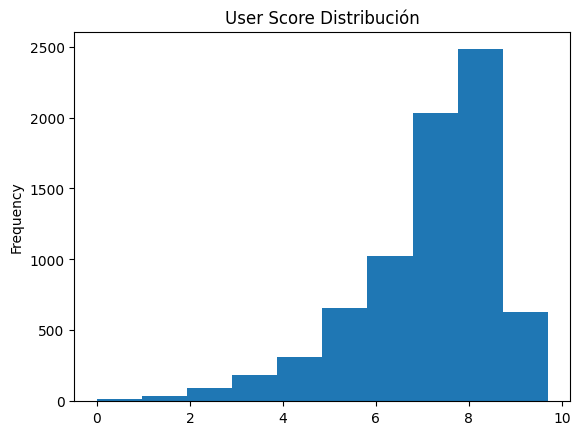

In [31]:
#Analizamos la frecuancia de los datos de la columna 'user_score'
data_base['user_score'].plot(kind='hist')
plt.title('User Score Distribución')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

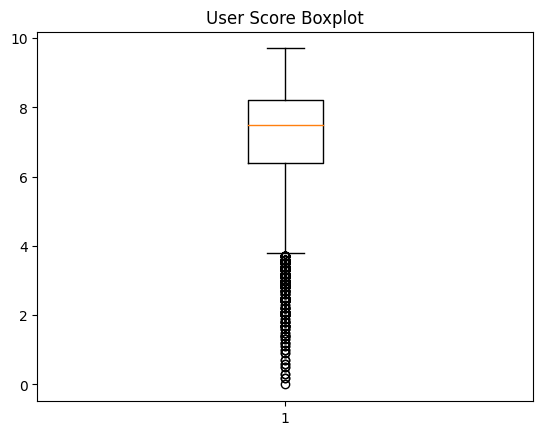

In [32]:
#Analizamos la posible existencia de datos atípicos en la columna 'user_score'
plt.boxplot(data_base[data_base['user_score'].notnull()]['user_score'])
plt.title('User Score Boxplot')
plt.show

En la primera gráfica (Frecuencias) se aprecia que hay una distribución de los datos sesgada hacia la derecha; además, la segunda gráfica (Diagrama de Caja) muestra la existencia de valores extremos atípicos. Por lo tanto se procede a reemplazar los datos ausentes por la mediana.

In [33]:
#Procedemos a reemplazar los valores ausentes por la mediana en la columna 'user_score'
data_base['user_score'].fillna(data_base['user_score'].median(),inplace = True)
#Verificamos lo realizado hasta el momento con la columna 'user_score'
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Se procede a responder las preguntas sobre el tratamiento de los valores ausentes:<br>
**Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.**<br>
Se decidió reemplazarlos por el valor de la mediana debido a la asimetría de la distribución de los datos de la columna 'user_score'.<br>
**¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.**<br>
Tomando ahora en cuenta el porcentaje de ausencia de datos del 50% aproximadamente para la columna 'user_score' es que se sospecha que hubo problemas en el ingreso de la información de dicho parámetro a la plataforma correspondiente, específicamente en años intermedios. Se deduce así que desde 1997 hasta 2009 (año con una cantidad pico de valores ausentes) la plataforma tuvo problemas para la recepción de la información de 'user_score' y que no fue hasta dicho año 2009 en el que se aplicó una medida de corrección en la plataforma para ir reduciendo los casos de valores ausentes (probablemente por errores en la plataforma), lo cual se aprecia en el comportamiento descendente desde 2009 hasta el 2016 (último año disponible en la base de datos).

In [34]:
#Observamos aún una importante cantidad de datos vacíós en el campo 'rating', procedemos a cuantificar
#porcentualmente dicha ausencia de datos para tomar una decisión sobre dichos valores ausentes
percentaje_rating_na = len(data_base[data_base['rating'].isna()])*100/len(data_base['rating'])
print(f"{percentaje_rating_na:.2f}%")

40.60%


Se aprecia que los datos faltantes representan un poco menos de la mitad de toda la data disponible, por lo que se concluye que debe llenarse con algún valor los valores ausentes de dicho campo. Debido a que la columna 'rating' no contiene información numérica, no puede realizarse un análisis para reemplazar valores ausentes por la media o mediana; por lo tanto, se reemplazarán los valores ausentes por el valor 'no_information'.

In [35]:
#Cambiando los valores ausentes por 'no_information'
data_base['rating'].fillna('no_information', inplace = True)
#Verificamos lo realizado hasta el momento con la columna 'user_score'
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Se procede a responder las preguntas sobre el tratamiento de los valores ausentes:<br>
**Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.**<br>
Se decidió reemplazarlos por el valor de 'no_information' debido a que la columna 'rating' cuenta con valores no numéricos y las filas con dicho campo vacío representaban aproximadamente el 40% de la data global.<br>
**¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.**<br>
Tomando ahora en cuenta el porcentaje de ausencia de datos del 40% aproximadamente para la columna 'rating' es que se sospecha que hubo problemas en el ingreso de la información de dicho parámetro a la plataforma correspondiente.

In [36]:
#Se procede a calcular las ventas totals para cada juego y a colocar dicho cálculo en una nueva columna
data_base['total_sales'] = data_base[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
#Vemos las primeras filas luego de haber creado la nueva columna
data_base.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,no_information,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,no_information,31.38


In [37]:
#Verificamos lo realizado hasta el momento con la nueva columna 'total_sales'
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.5+ MB


**3 Analiza los datos**

# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

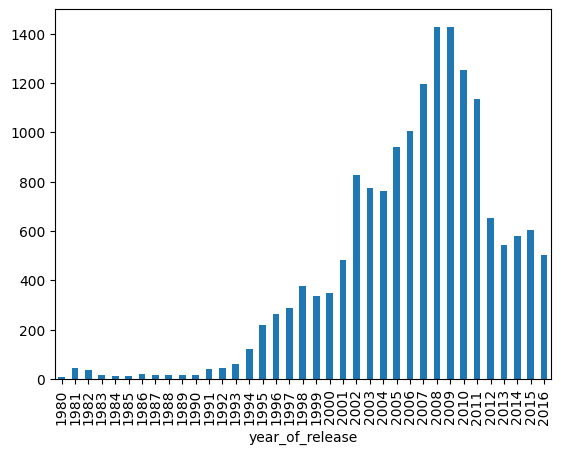

In [38]:
#A continuación comenzamos a observar cuántos juegos fueron lanzados en diferentes años. 
data_base.groupby('year_of_release')['name'].count().plot(kind='bar')
plt.show()

De la gráfica anterior observamos la presencia de pico en las ventas durante los años 2008 y 2009; a partir de los cuales la tendencia a sido a que dichas ventas comiencen a disminuir con el tiempo. Aproximadamente en los primeros 10 años del registro disponible se observa que la magnitud de las ventas es baja en comparación de años más recientes.

# Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [39]:
#A continuación comenzamos a observar cómo varían las ventas de una plataforma a otra.
#Realizamos un ordenamiento de la suma de las ventas totales respecto de las plataformas de la base de datos
sales_platform = data_base.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
top_platform = sales_platform.head(5) # Aquí seleccionamos las 5 plataformas con mayores ventas
top_platform_name = top_platform.index # Aquí recuperamos los nombres de las 5 plataformas con mayores ventas

data_base_top_platforms = data_base[data_base['platform'].isin(top_platform_name)] # Recuperamos la información de las ventas de las 
# 5 plataformas con las mayores ventas
data_base_top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16429,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,71,7.5,no_information,0.01
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,71,7.5,E,0.01
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,71,7.5,no_information,0.00
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71,7.5,no_information,0.01


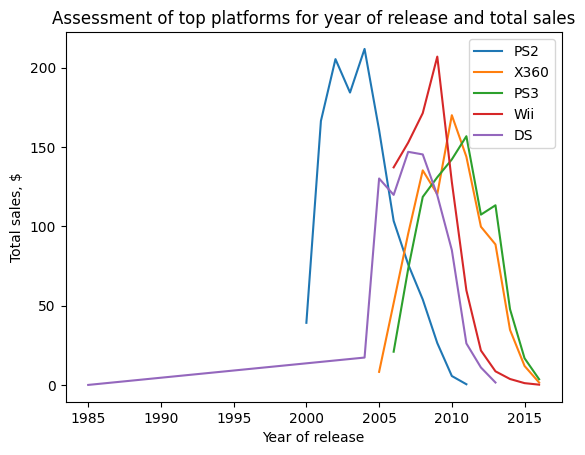

In [40]:
# Procedemos con la elaboración de un gráfico de líneas para observar y analizar como evoluciona la tendencia de las ventas
# de las plataformas con mayores ventas a lo largo del tiempo

for platform in top_platform_name:
    total_sales_anual = data_base_top_platforms[data_base_top_platforms['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(total_sales_anual.index, total_sales_anual.values, label = platform)

plt.xlabel('Year of release')
plt.ylabel('Total sales, $')
plt.title('Assessment of top platforms for year of release and total sales')
plt.legend()
plt.show()

In [41]:
#A continuación buscamos y analizamos las plataformas en las que se hayan presentado una menor cantidad de ventas
worst_platforms = sales_platform.tail(5)
worst_platforms

platform
WS      1.42
TG16    0.16
3DO     0.10
GG      0.04
PCFX    0.03
Name: total_sales, dtype: float64

In [42]:
#A continuación respondermos a la pregunta "¿Cuánto tardan generalemente las nuevas plataformas en aparecer y
#las antiguas en desaparecer?"
life_time_platforms = data_base.groupby('platform')['year_of_release'].agg(['min','max'])
life_time_platforms['total_duration_years'] = life_time_platforms['max'] - life_time_platforms['min']
mean_duration = life_time_platforms['total_duration_years'].mean()
print(f"{mean_duration:.2f} years")

7.61 years


# Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

A partir del gráfico de ventas totales de las plataformas con mayores ventas respecto de sus ventas totales; se puede determinar que, aproximadamente, desde el año 2000 se puede iniciar la toma de datos para plantear un modelo predictivo para el 2017 ya que desde dicho año puede apreciarse como las plataformas comienzan a crecer en ventas hasta su pico histórico y cómo estas comienzan de decaer hasta casi desaparecer sus ventas totales; lo cual da un indicador de su tiempo de vida.

# Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

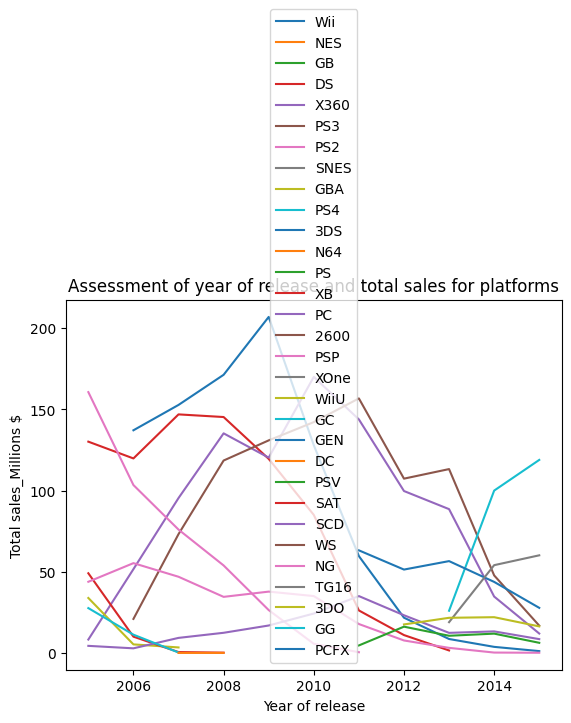

In [43]:
#En base a los análisis previos, los datos relevantes que sugiero tomar en cuenta son: nombres de los juegos, plataformas,
#año de lanzamiento y las ventas totales en el periodo 2005-2015

for platform in data_base['platform'].unique():
    verification =(data_base['platform'] == platform) & (data_base['year_of_release'] >= 2005) & (data_base['year_of_release'] <= 2015)
    sales_anual = data_base[verification].groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_anual.index, sales_anual.values, label = platform)


plt.xlabel('Year of release')
plt.ylabel('Total sales_Millions $')
plt.title('Assessment of year of release and total sales for platforms')
plt.legend()
plt.show()



# ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

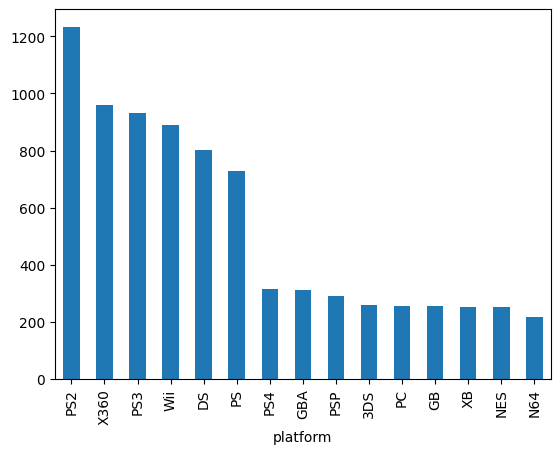

Profitable platforms:PS2, X360, PS3, Wii, DS and PS.


In [44]:
#Se procede a analizar las 15 plataformas potencialmente más rentables en base a sus ventas totales
profitable_platforms = sales_platform.head(15)
profitable_platforms.plot(kind='bar')
plt.show()
print(f"Profitable platforms:{sales_platform.index[0]}, {sales_platform.index[1]}, {sales_platform.index[2]}, {sales_platform.index[3]}, {sales_platform.index[4]} and {sales_platform.index[5]}.")

In [45]:
#Se tiene una sospecha sobre el registro de las ventas del año 2016 (último año de la base de datos), se procede a analizarla
data_base[data_base['year_of_release'] >= 2016].groupby('platform')['total_sales'].sum()

platform
3DS     15.14
PC       5.25
PS3      3.60
PS4     69.25
PSV      4.25
Wii      0.18
WiiU     4.60
X360     1.52
XOne    26.15
Name: total_sales, dtype: float64

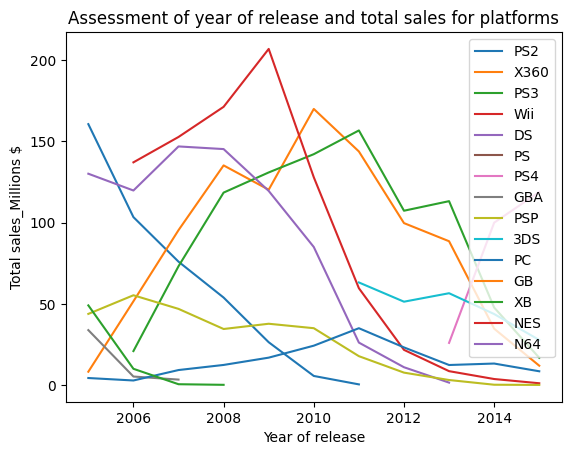

In [46]:
#De lo anterior se observa una cantidad menor en las ventas respecto de años anteriores; ello puede deberse a que el regisro de ventas
#del año 2016 están incompletas; probablemente por emitir la base de datos sin haber culminado los meses de ventas de dicho año 2016
#Por ello, obtamos por considerar y analizar hasta el año 2015

for platform in profitable_platforms.index:
    data_base_condition=data_base[(data_base['platform'] == platform) & (data_base['year_of_release'] >= 2005) & (data_base['year_of_release'] <= 2015)]
    sales_anual=data_base_condition.groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_anual.index, sales_anual.values, label=platform)
    
plt.xlabel('Year of release')
plt.ylabel('Total sales_Millions $')
plt.title('Assessment of year of release and total sales for platforms')
plt.legend()
plt.show()

Analizando el gráfico anterior encontramos que, mientras mayor es la cantidad de años transcurridos desde la fecha de lanzamiento de una plataforma, dicha plataforma tenderá a reducir su impacto en las ventas totales. Se observa también que en años más recientes de la base de datos, aproximadamente en el año 2013, se encuentra una plataforma dentro de las top 15 en ventas que tiene una tendencia al crecimiento.

# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

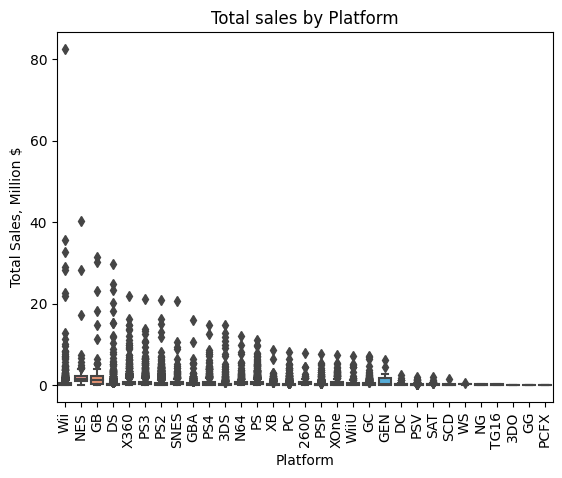

In [47]:
sns.boxplot(x='platform', y='total_sales', data=data_base)
plt.xlabel('Platform')
plt.ylabel('Total Sales, Million $')
plt.title('Total sales by Platform')
plt.xticks(rotation = 90) 
plt.show()

En base al diagrama de cajas anterior mostrado, puede observarse muchos valores atípicos de ventas totales para las diferentes plataformas (en algunos casos con diferencias muy significativas); sin embargo, debido a la alta presencia de valores atípicos es que se dificulta la interpretación de esta opción gráfica. Se podría recomendar otro tipo de configuración visual de resultados para una más adecuada interpretación.

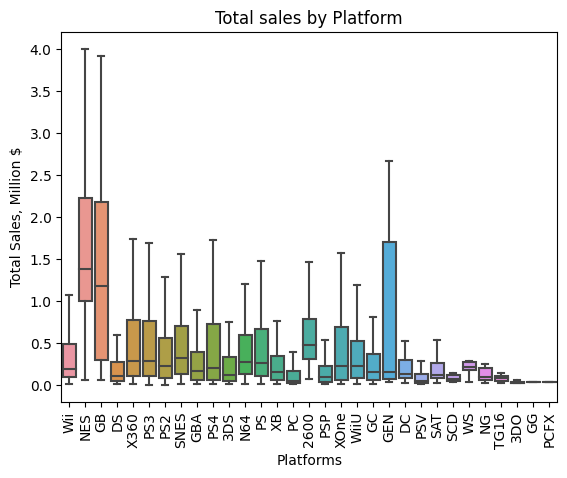

In [48]:
#Se procede a mostrar un gráfico alternativo al anterior sin la presencia de valores atípicos para complementar el análisis requerido
sns.boxplot(x='platform', y='total_sales', data=data_base, showfliers=False)
plt.xlabel('Platforms')
plt.ylabel('Total Sales, Million $')
plt.title('Total sales by Platform')
plt.xticks(rotation=90) 
plt.show()

En base al esquema anterior es que podemos encontrar que las plataformas NES y GB presentan las medianas con mayor valor de esta base de datos, con un valor de ventas totales cercanos a 1.5 millones de dólares. La mayoría de las demás plataformas poseen medianas que oscilan aproximadamente entre 0 y 0.75 millones de dólres (practicamente la mitad o menos de la mitad de las 2 predominantes indicadas al inicio). Se observa también que, además de las plataformas predominantes NES y GB, GEN presenta un IQR significativo donde un considerable porcentaje de sus ventas totales tienen un mayor valor respecto de su mediana. Finalmente, para todas las plataformas se comprueba la existencia de una cantidad importante de valores atípicos.

# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

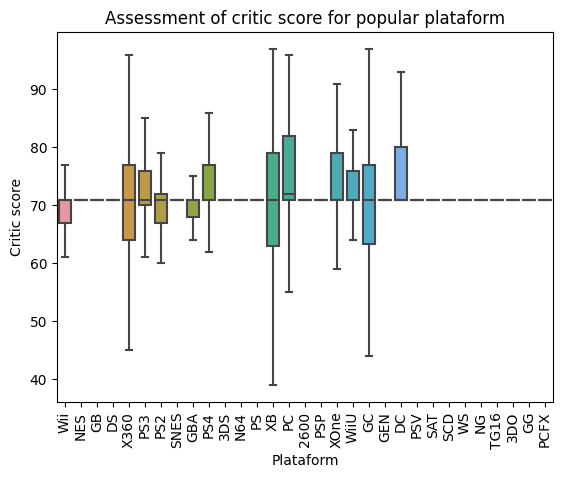

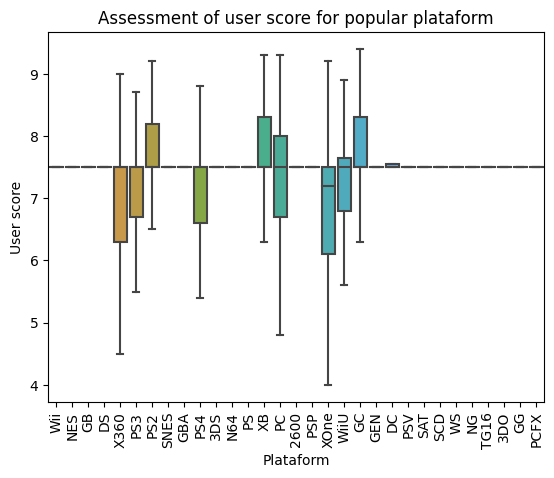

In [49]:
#Se procede a analizar el impacto de las reseñas sobre una de las plataformas más populares encontradas

sns.boxplot(x='platform', y='critic_score', data=data_base,showfliers=False)
plt.xlabel('Plataform')
plt.ylabel('Critic score')
plt.title('Assessment of critic score for popular plataform')
plt.xticks(rotation=90) 
plt.show()

sns.boxplot(x='platform', y='user_score', data=data_base,showfliers=False)
plt.xlabel('Plataform')
plt.ylabel('User score')
plt.title('Assessment of user score for popular plataform')
plt.xticks(rotation=90) 
plt.show()

Debido a que en la plataforma XOne no han modificado los valores ausentes por el reemplazo de su mediana es que se opta por analizar dicha plataforma en los siguientes resultados.

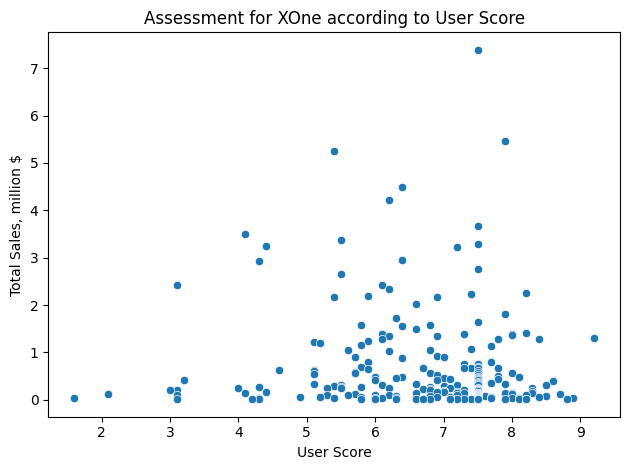

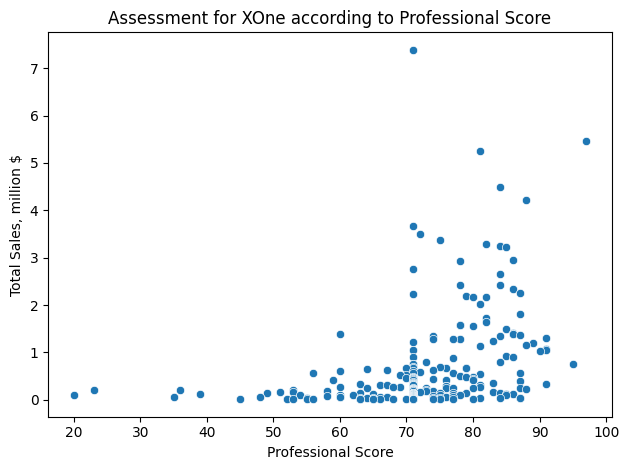

In [50]:
#Se procede a analizar la dispersión de los datos disponibles respecto a las reseñas de las plataformas

platform_analyzed='XOne'
data_base_platform=data_base[data_base['platform']==platform_analyzed]

# Se procede a plantear el análisis para la reseña de los usuarios
sns.scatterplot(x='user_score', y='total_sales', data=data_base_platform)
plt.xlabel('User Score')
plt.ylabel('Total Sales, million $')
plt.title(f'Assessment for {platform_analyzed} according to User Score')
plt.tight_layout()
plt.show()

# Se procede a plantear el análisis para la reseña de los profesionales
sns.scatterplot(x='critic_score', y='total_sales', data=data_base_platform)
plt.xlabel('Professional Score')
plt.ylabel('Total Sales, million $')
plt.title(f'Assessment for {platform_analyzed} according to Professional Score')
plt.tight_layout()
plt.show()

In [51]:
#Se procede a calcular la correlación del análisis de las puntuaciones de los usuarios respecto del total de ventas
correlation_user_score = data_base_platform['user_score'].corr(data_base_platform['total_sales'])
print(f"Correlation between user score and total sales: {correlation_user_score:.3f}")

Correlation between user score and total sales: -0.106


In [52]:
#Se procede a calcular la correlación del análisis de las puntuaciones de los profesionales respecto del total de ventas
correlation_critic_score = data_base_platform['critic_score'].astype('float64').corr(data_base_platform['total_sales'])
print(f"Correlation between critic score and total sales: {correlation_critic_score:.3f}")

Correlation between critic score and total sales: 0.360


Con respecto a las correlaciones halladas para las puntuaciones respecto de las ventas totales:  
_En el caso de la puntuación de usuarios, se ha encontrado una correlación negativa pequeña; la cual, si bien señala un descenso de las ventas totales mientras aumenta la puntuación de los usuarios, al poseer esta correlación una magnitud pequeña (y cercana a 0) es que se cataloga como una correlación débil, por lo que no puede afirmarse que haya una relación determinante respecto de este primer tipo de reseña sobre las ventas totales.  
_En el caso de la puntuación de profesionales, se ha encontrado una correlación positiva relativamente intermedia; la cual señala un crecimiento de las ventas totales mientras aumenta la puntuación de los profesionales, al poseer esta correlación una magnitud relativamente intermedia es que se cataloga como una correlación moderada, por lo que puede afirmarse que hay una relación parcialmente determinante respecto de este segundo tipo de reseña sobre las ventas totales.

# Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [53]:
#Se procede a agrupar por juego las plataformas de los juegos que pertenecen a la plataforma analizada (XOne)
name_games_XOne=data_base_platform['name'].value_counts().index
data_base_game_platform=data_base[data_base['name'].isin(name_games_XOne)]
data_base_game_platform_without_XOne=data_base_game_platform[data_base_game_platform['platform']!='XOne']
data_base_game_platform_without_XOne

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71,7.5,no_information,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16239,Ride 2,PC,2016,Racing,0.00,0.01,0.00,0.00,78,7.9,E,0.01
16248,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,71,1.4,E,0.01
16259,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01
16360,The Amazing Spider-Man 2 (2014),PC,2014,Action,0.00,0.01,0.00,0.00,71,7.5,no_information,0.01


In [54]:
#Se procede a obtener la correlación de la crítica de usuarios y de los profesionales para las plataformas; respecto de las ventas totales
dict_corr={}

# Se procede a agrupar por plataforma y calcular la correlación entre 'critic_score' y 'user_score' con 'total_sales' para cada grupo
for platform in data_base_game_platform_without_XOne['platform'].unique():
    data_base_filtrated = data_base_game_platform_without_XOne[data_base_game_platform_without_XOne['platform'] == platform]
    
    if len(data_base_filtrated) > 1: # Aquí procedemos con el filtrado de gilas que sí contengan información
        correlation_user = data_base_filtrated['user_score'].corr(data_base_filtrated['total_sales'])
        correlation_critic = data_base_filtrated['critic_score'].astype('float64').corr(data_base_filtrated['total_sales'])
        dict_corr[platform] = [correlation_user, correlation_critic]
    else:
        dict_corr[platform] = [None, None]  # Aquí se procede a omitir el cálculo si la fila no contiene información

# Convertimos el diccionario en un DataFrame
data_base_corr = pd.DataFrame.from_dict(dict_corr, orient='index', columns=['user_score_correlation', 'critic_score_correlation'])
data_base_corr

,user_score_correlation,critic_score_correlation
PS3,-0.055193,0.464151
X360,-0.044080,0.446311
PS4,-0.028602,0.347089
PC,-0.037231,0.296849
Wii,0.270212,0.261975
PSV,-0.101141,-0.015647
GC,NaN,NaN
WiiU,0.147523,0.339116
3DS,-0.424990,-0.302041
PSP,0.406855,NaN


En base a lo observado de la tabla anterior, se encuentra una tendencia a que la mayoría de plataformas tengan una correlación negativa débil para los usuarios; y una correlación positiva moderada (similar a lo encontrado para la plataforma analizada anteriormente, XOne) para los profesionales; con excepción de las plataformas Wii, WiiU y PSP.

Con respecto a la correlación encontrada según los profesionales, la mayoría cuenta con una moderada positiva; a excepción de las plataformas PSV y 3DS.

# Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [55]:
#Procedemos a calcular la cantidad de juegos y las ventas totales por género

sales_per_genre = data_base.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'})
sales_per_genre.columns = ['total_games', 'total_sales']

#Procedemos a calcular el promedio de ventas por juego en cada género
sales_per_genre['mean_sales'] = sales_per_genre['total_sales'] / sales_per_genre['total_games']

# Procedemos a ordenar por ventas totales para ver los géneros más rentables
sales_per_genre = sales_per_genre.sort_values(by='total_sales', ascending=False)
sales_per_genre

,total_games,total_sales,mean_sales
genre,,,
Action,3307,1716.52,0.519057
Sports,2306,1309.67,0.567940
Shooter,1296,1041.36,0.803519
Role-Playing,1481,931.08,0.628683
Platform,878,825.55,0.940262
Misc,1721,790.29,0.459204
Racing,1226,723.49,0.590122
Fighting,837,442.66,0.528865
Simulation,857,387.96,0.452695


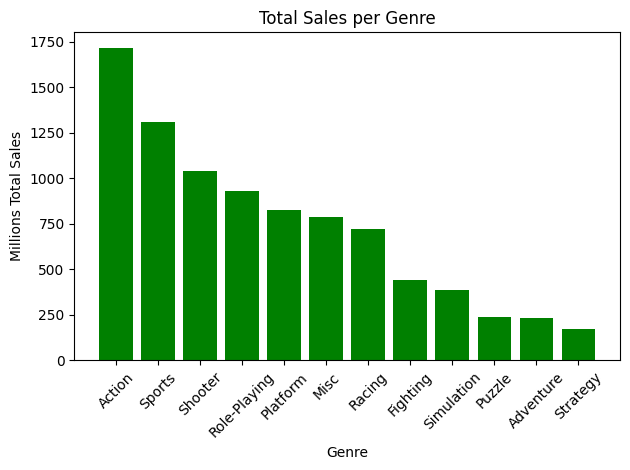

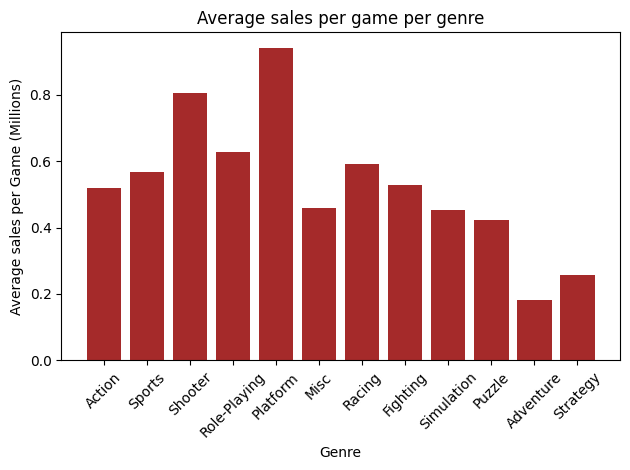

In [56]:
#Se procede a observar la distribución de juegos por género
plt.bar(sales_per_genre.index, sales_per_genre['total_sales'], color='green')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Millions Total Sales')
plt.title('Total Sales per Genre')
plt.tight_layout()
plt.show()

#Se procede a observar el promedio de ventas por juego en cada género
plt.bar(sales_per_genre.index, sales_per_genre['mean_sales'], color='brown')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average sales per Game (Millions)')
plt.title('Average sales per game per genre')
plt.tight_layout()
plt.show()

Del primer gráfico se aprecia que el género con mayor cantidad de ventas es "Action"; mientras que el géneero con menor cantidad de ventas es "Strategy". Del segundo gráfico se aprecia que el género "Platform" es el que posee el mayor promedio de ventas por juego; mientras que el género con menor promedio de ventas por juego es "Adventure". De estas 2 observaciones y géneros predominantes, se puede afirmar que los juegos del género "Platform" tienden a ser más caros en comparación de los del género "Action", a pesar que este último tiene mayor cantidad de ventas.

**4 Crea un perfil para cada región**

# Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [57]:
#Se precede a agrupar las plataformas por ventas en cada región y observar las 5 plataformas principales bajo dicho criterio
main_platforms_na = data_base.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
main_platforms_eu = data_base.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
main_platforms_jp = data_base.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print(f'The main platforms in NA are: \n {main_platforms_na} \n  in EU are: \n {main_platforms_eu} \n in JP are: \n {main_platforms_jp}')

The main platforms in NA are: 
 platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64 
  in EU are: 
 platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64 
 in JP are: 
 platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


De lo anterior se observa que las cuotas de mercado en Norteamérica son medianamente superiores a las de la Unión Europea y notoriamente superiores a las de Japón, lo cual podría demostrar que en esta primera región los usuarios están más predispuestos a gastar para el uso de las plataformas. Adicionalmente, se observa que la plataforma "PS2" es la única que aparece en las 5 principales de cada región, lo cual podría sugerir investigar más de las estrategias de venta usadas en dicha plataforma para poder adaptarlas y aplicarlas en nuevas plataformas y así potenciar su alcance en todas las regiones.

# Los cinco géneros principales. Explica la diferencia.

In [58]:
#Se precede a agrupar las plataformas por género en cada región y observar las 5 plataformas principales bajo dicho criterio
main_genres_na = data_base.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
main_genres_eu = data_base.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
main_genres_jp = data_base.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print(f'The main genres in NA are: \n {main_genres_na} \n in EU are: \n {main_genres_eu} \n in JP are: \n {main_genres_jp}')

The main genres in NA are: 
 genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64 
 in EU are: 
 genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64 
 in JP are: 
 genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


Los principales género en las regiones de Norteamérica y la Unión Europea son apreciablemente similares, teniendo incluso 4 géneros principales en las mismas posiciones de preferencia ("Action", "Sports", "Shooter" y "Misc" en el 1°, 2°, 3° y 5° luegar, respectivamente). Si bien la región de Japón muestra cierta similitud al tener los géneros "Action", "Sports" y "Misc" en el top 5, se encuentra que el género más popular en dicha región es el de "Role-Playing", el cual ni siquiera aparece en el top 5 de las otras 2 regiones. Finalmente, las regiones de Norteamérica y Japón también comparten que ambos tienen al género "Plattform" en su top 5 de preferencia pero este no aparece en las principales de la región de la Unión Europea.

# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [59]:
rating_sales_na = data_base.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_sales_eu = data_base.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_sales_jp = data_base.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
    
print(f'The sales por rating in NA are: \n {rating_sales_na} \n in EU are: \n {rating_sales_eu} \n in JP are: \n {rating_sales_jp}')

The sales por rating in NA are: 
 rating
E                 1274.24
no_information    1225.84
T                  747.60
M                  742.89
E10+               345.50
K-A                  2.56
EC                   1.53
AO                   1.26
RP                   0.00
Name: na_sales, dtype: float64 
 in EU are: 
 rating
E                 703.87
no_information    609.65
M                 480.00
T                 421.79
E10+              183.35
AO                  0.61
K-A                 0.27
EC                  0.11
RP                  0.03
Name: eu_sales, dtype: float64 
 in JP are: 
 rating
no_information    836.74
E                 197.96
T                 150.70
M                  63.58
E10+               40.20
K-A                 1.46
AO                  0.00
EC                  0.00
RP                  0.00
Name: jp_sales, dtype: float64


In [60]:
rating_sales_na = data_base.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_sales_eu = data_base.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_sales_jp = data_base.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
    
print(f'The sales por rating in NA are: \n {rating_sales_na} \n in EU are: \n {rating_sales_eu} \n in JP are: \n {rating_sales_jp}')

The sales por rating in NA are: 
 rating
E                 1274.24
no_information    1225.84
T                  747.60
M                  742.89
E10+               345.50
K-A                  2.56
EC                   1.53
AO                   1.26
RP                   0.00
Name: na_sales, dtype: float64 
 in EU are: 
 rating
E                 703.87
no_information    609.65
M                 480.00
T                 421.79
E10+              183.35
AO                  0.61
K-A                 0.27
EC                  0.11
RP                  0.03
Name: eu_sales, dtype: float64 
 in JP are: 
 rating
no_information    836.74
E                 197.96
T                 150.70
M                  63.58
E10+               40.20
K-A                 1.46
AO                  0.00
EC                  0.00
RP                  0.00
Name: jp_sales, dtype: float64


De estos resultados se encuentra que, aquellos juegos a los que se les asignaron las clasificaciones "E", "T" y "M" lideran las ventas en las 3 regiones; principalmente en Norteamérica. También se aprecia que aquellos juegos con clasificación "E10+" tiene ventas notorias en las 3 regiones pero con menor magnitud. En contraposición, los juegos con clasificación "K-A", "EC", "AO" y "RP" son las que, muy apreciablemente, tienen menor ventas en todas las regiones (donde en algunos casos son incluso casi nulas). Finalmente, se aprecia que hay una cantidad importante de ventas en juegos no clasificados (siendo inclusio "primero" en la región de Japón); se sugeriría poder relacionarlos de alguna manera con uno de los ranking oficiales (en la medida de lo posible) y observar si ello cambia la posición de predominancia de ventas de estas clasificaciones en alguna de las regiones.

**5 Prueba las siguientes hipótesis:**

# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [61]:
data_base_XOne = data_base[data_base['platform'] == 'XOne']['user_score']
data_base_PC = data_base[data_base['platform'] == 'PC']['user_score']

# Para la presente prueba de hipótesis se propone usar un valor de umbral del 5%
alpha = 0.05


# Se aplica la prueba t para muestras independientes
# Se aplica la función ttest_ind, el cual es el adecuado para comparar directamente los grupos independientes data_base_XOne y data_base_PC
# Para generar mayor precisión al análisis de la prueba t en caso de varianzas desconocidas o diferentes en las dos muestras, se aplica equal_var=False

comparisson_results = st.ttest_ind(data_base_XOne, data_base_PC, equal_var=False)  

# Se procede a indicar el valor p del análisis
print('p value:', comparisson_results.pvalue)

# Método aplicar para la decisión final: Si el valor p obtenido es menor que alpha, rechazaremos la hipótesis nula; de lo contrario, la aceptaremos
if comparisson_results.pvalue < alpha:
    print("We reject the null hypothesis: average user ratings are different between Xbox One and PC")
else:
    print("We cannot reject the null hypothesis: average user ratings are the same between Xbox One and PC")

p value: 4.3968409560037004e-05
We reject the null hypothesis: average user ratings are different between Xbox One and PC


# Explica: ¿Cómo formulaste las hipótesis nula y alternativa?, ¿Qué criterio utilizaste para probar las hipótesis y por qué?

Se ha planteado que la hipótesis nula sería que el promedio de las calificaciones de las plataformas "Xbox One" y "PC" son iguales; mientras que la hipótesis alternativa planteada fue que dichos promedio fuesen diferentes.
Se ha asumido que ambas muestras (promedios de las calificaciones de las plataformas "Xbox One" y "Pc") son independientes entre sí, por ello se ha aplicado una prueba t para dichas muestras independientes (en las que sus varianzas no son necesariamente iguales) en las que se están comparando sus promedios; y donde esta prueba realiza el análisis a dos colas debido a que nos interesa incluir la diferencia en ambas direcciones; es decir, si es mayor o menor. 
A pesar de lo anteriormente descrito, se debe tomar con precausión los resultados obtenidos ya que la data relacionada a la "Xbox One" fue rellenada con el valor de la mediana donde se habían reportado valores ausentes en un rango importante importante de años, lo cual podría estar afectando el resultado de la prueba de hipótesis; se sugiere profundizar con un mayor análisis en el llenado de dichos valores ausentes previo a la prueba de hipótesis.

# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [62]:
data_base_action = data_base[data_base['genre'] == 'Action']['user_score']
data_base_sports = data_base[data_base['genre'] == 'Sports']['user_score']

# Para la presente prueba de hipótesis se propone usar un valor de umbral del 5%
alpha = 0.05

# Se aplica la prueba t para muestras independientes
# Se aplica la función ttest_ind, el cual es el adecuado para comparar directamente los grupos independientes data_base_action y data_base_sports
# Para generar mayor precisión al análisis de la prueba t en caso de varianzas desconocidas o diferentes en las dos muestras, se aplica equal_var=False
results = st.ttest_ind(data_base_action, data_base_sports, equal_var=False)

# Se procede a indicar el valor p del análisis
print('p value:', results.pvalue)

# Método aplicar para la decisión final: Si el valor p obtenido es menor que alpha, rechazaremos la hipótesis nula; de lo contrario, la aceptaremos
if results.pvalue < alpha:
    print("We reject the null hypothesis: average user ratings are different between Action and Sports")
else:
    print("We cannot reject the null hypothesis: average user ratings are the same between Action y Sports")

p value: 0.5696868901880056
We cannot reject the null hypothesis: average user ratings are the same between Action y Sports


# Explica: ¿Cómo formulaste las hipótesis nula y alternativa?, ¿Qué criterio utilizaste para probar las hipótesis y por qué?

Se ha planteado que la hipótesis nula sería que el promedio de las calificaciones de los géneros "Action" y "Sports" son iguales; mientras que la hipótesis alternativa planteada fue que dichos promedio fuesen diferentes.
Se ha asumido que ambas muestras (promedios de las calificaciones de los géneros "Action" y "Sports") son independientes entre sí, por ello se ha aplicado una prueba t para dichas muestras independientes (en las que sus varianzas no son necesariamente iguales) en las que se están comparando sus promedios; y donde esta prueba realiza el análisis a dos colas debido a que nos interesa incluir la diferencia en ambas direcciones; es decir, si es mayor o menor.
A pesar de lo anteriormente descrito, se debe tomar con precausión los resultados obtenidos ya que la data relacionada a ambos géneros fue adaptada de tal manera que, donde se registró el valor de "tbd" para la calificación de los usuarios fue reemplazado con el valor de la mediana, lo cual podría estar afectando el resultado de la prueba de hipótesis; se sugiere profundizar con un mayor análisis en el cambio de dichos valores "tbd" previo a la prueba de hipótesis.

**6 Escribe una conclusión general**

En base al trabajo desarrollado se puede llegar a los siguientes puntos como conclusiones finales del análisis:  
I. En cuanto a la apertura del archivo, la data original pudo ser importada correctamente a la plataforma de análisis para el inicio de la preparación de los datos.   
II. En cuanto a la preparación de los datos, se encontraron varios aspectos por arreglar en cuanto a la información original; ya que, previo al inicio de los análisis, se verificó una consistencia adecuada en la estructura de los datos:  
&nbsp;&nbsp;&nbsp;&nbsp;II.I. Duplicados parciales, nombres de parámetros en minúsculas, compatibilidad entre variables y el tipo correspondiente a dicha variable, ausencia de datos y presencia de valores inicialmente desconocidos como "tbd", eliminación de filas que no brindarían información relevante.  
&nbsp;&nbsp;&nbsp;&nbsp;II.II. En todos estos casos encontrados, se aplicaron las técnicas más adecuadas respectivas; en el caso de las variables cuantitativas se aplicó el reemplazo de valores ausentes por la mediana en caso de que la dispersión de los valores no ausentes fuese elevada y asignación de ausencia de valores en los datos con valor "tbd" (para el posterior reemplazo de estas ausencias por la mediana) y asignación del tipo de dato int o float a las varibales de dicha naturaleza cuantitativa (dependiendo del contenido de la variable).   
&nbsp;&nbsp;&nbsp;&nbsp;II.III. En el caso de las variables cualitativas, el reemplazo de valores ausentes se basó en brindar algún indicador claro de dicha ausencia, como por ejemplo 'no_information' para su posterior interpretación en los análisis a realizar.  
III. En cuanto al análisis de los datos:  
&nbsp;&nbsp;&nbsp;&nbsp;III.I. Según el registro, hubo una tendencia en el aumento de los juegos lanzados por año, con pico en los años 2008 y 2009; y luego un descenso hasta el último año de dicho registro. En general las nuevas plataformas tardan entre 7 a 8 años en aparecer y las antiguas en desaparecer. Se sugeriría trabajar con la data disponible desde el año 2000 en adelante para generar un modelo predictivo al año 2017 (y posterior) debido a la predominancia encontrada en cuanto a las ventas totales a partir del año 2000 (especialmente desde el año 2005).  
&nbsp;&nbsp;&nbsp;&nbsp;III.II. La plataforma “PS2” es la líder en ventas, seguido por “X360”, “PS3”, “Wii”, “DS” y “PS” con ventas totales aproximadamente similares entre sí; sin embargo, la plataforma “PS4” tiene una reciente tendencia a incrementar y es por ello una potencialmente rentable para los próximos años.  
&nbsp;&nbsp;&nbsp;&nbsp;III.III. Para todas las plataformas se presentan datos atípicos (en una cantidad importante) en cuanto a las ventas presentadas, en donde las plataformas “NES” y “GB” poseen las medianas mas altas del registro.  
&nbsp;&nbsp;&nbsp;&nbsp;III.IV. La puntuación de los profesionales guarda una relación medianamente positiva respecto de las ventas totales, lo cual podría tomar como guía para elevar futuras ventas en los nuevos lanzamientos de las plataformas; la puntuación de los usuarios, en cambio, posee una correlación débil respecto dichas ventas y quizás podría no tomarse con mucha relevancia.  
&nbsp;&nbsp;&nbsp;&nbsp;III.V. Mientras que el género “Action” registra el mayor ingreso total en ventas, el género “Platform” registra el mayor promedio en ingreso por ventas por juego, lo cual mostraría que el primero mencionado es más popular mientras que el segundo, con popularidad intermedia, tiende a ser más caro por unidad vendida. En contraposición, los géneros “Adventure” y “Strategy” muestran los peores indicadores en cuanto a popularidad debido a la relativa baja cantidad de ingresos por ventas (a pesar de ser también los más económicos por unidad vendida).  
IV. En cuanto a la creación de un perfil de usuario para cada región:  
&nbsp;&nbsp;&nbsp;&nbsp;IV.I. Las regiones de Norteamérica y la Unión Europea poseen tendencias similares en cuanto a preferencias a plataformas y géneros (y son a la vez las regiones donde se presenta mayor disposición en los usuarios por comprar juegos en base a los ingresos registrados); dichas regiones poseen similitud intermedia con Japón según lo analizado.  
&nbsp;&nbsp;&nbsp;&nbsp;IV.II. La plataforma “PS2” está presente en el top5 de todas las regiones, por lo que sería sugerible estudiar su caso en particular para replicar las estrategias de ventas en potenciables nuevos juegos y/o plataformas. Se presenta un caso particular acerca del género “Role-Playing” que es el preferido (muy notoriamente) en la región de Japón, pero no está presente en el top 5 de las demás regiones, podría sugerirse entonces enfocar las estrategias de marketing de los juegos de dicho género en Japón, región en donde claramente se encuentra el público objetivo principal de dicho género en particular.  
&nbsp;&nbsp;&nbsp;&nbsp;IV.III. En las 3 regiones analizadas, la obtención de las clasificaciones “E”, “T” y “M” son muy buen indicador para estimar el éxito en ventas, mientras que la obtención de las clasificaciones “K-A”, “EC”, “AO” y “RP” son, en contraposición, muy buen indicador para estimar el fracaso en ventas.  
V. En cuanto a la generación de prueba de hipótesis, se ha analizado el promedio en calificaciones de los usuarios, en donde las plataformas “Xbox One” y “PC” poseen una media diferente entre sí; mientras que los géneros “Acción” y “Deportes” poseen una media igual entre sí; todo esto bajo la ejecución de una prueba de hipótesis t a dos colas (con varianzas desconocidas y no necesariamente iguales entre sí) con un porcentaje de umbral considerado del 5%. En el primer caso la hipótesis nula fue rechazada; mientras que en el segundo caso la hipótesis nula no fue rechazada.